<a href="https://colab.research.google.com/github/pusatalamsemestaa/Machine-Learning/blob/main/UTS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Library

In [10]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551809 sha256=da2a73de2f0a63ee7a35743e74cff44b2d1ebe76fe5fac3e728f2b11e71fe459
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from annoy import AnnoyIndex
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Upload Dataset ke Colab (Tuliskan catatan singkat tentang kondisi awal dataset dan kolom mana yang memiliki missing values)

In [15]:
# Upload atau load dataset dari Kaggle
# (ubah path sesuai dataset masing-masing)


from google.colab import files
uploaded = files.upload()

df = pd.read_csv('heart.csv')

df.info()
df.describe()
df.head()

Saving heart.csv to heart (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


##  3. Data Preprocessing (Catat kolom apa yang memiliki missing values dan fitur baru apa yang Anda buat)

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Baca dataset
df = pd.read_csv('heart.csv')

# Tampilkan missing values per kolom
print("Jumlah missing values per kolom:")
print(df.isnull().sum())


# Tangani missing values
df.fillna(df.mean(), inplace=True)

# (Opsional) Buat fitur baru
# df['NewFeature'] = df['Feature1'] / df['Feature2']

# Normalisasi data numerik
num_df = df.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
x_scaled = scaler.fit_transform(num_df)


Jumlah missing values per kolom:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


## 4. Clustering dengan Kmeans dan DBScan

In [29]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd

# Baca dataset
df = pd.read_csv('heart.csv')

# -----------------------------
# KMeans
# -----------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(x_scaled)

# -----------------------------
# DBSCAN
# -----------------------------
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(x_scaled)

# -----------------------------
# Evaluasi
# -----------------------------
print("=== Evaluasi Clustering ===")
print("KMeans Silhouette:", silhouette_score(x_scaled, labels_kmeans))
print("KMeans Davies-Bouldin:", davies_bouldin_score(x_scaled, labels_kmeans))
print("DBSCAN Silhouette:", silhouette_score(x_scaled, labels_dbscan))
print("DBSCAN Davies-Bouldin:", davies_bouldin_score(x_scaled, labels_dbscan))

# -----------------------------
# Menampilkan hasil clustering
# -----------------------------
print("\n=== Hasil Cluster KMeans ===")
print("Label KMeans:", labels_kmeans)
print("Jumlah anggota per cluster (KMeans):")
print(pd.Series(labels_kmeans).value_counts())

print("\n=== Pusat Cluster KMeans ===")
print(kmeans.cluster_centers_)

print("\n=== Hasil Cluster DBSCAN ===")
print("Label DBSCAN:", labels_dbscan)
print("Jumlah anggota per cluster (DBSCAN):")
print(pd.Series(labels_dbscan).value_counts())

=== Evaluasi Clustering ===
KMeans Silhouette: 0.12644968113912014
KMeans Davies-Bouldin: 2.5462839965021824
DBSCAN Silhouette: -0.13128820330579608
DBSCAN Davies-Bouldin: 1.0702597981888244

=== Hasil Cluster KMeans ===
Label KMeans: [2 0 0 ... 0 2 0]
Jumlah anggota per cluster (KMeans):
2    361
0    361
1    303
Name: count, dtype: int64

=== Pusat Cluster KMeans ===
[[ 0.35047307  0.21000605 -0.76771451  0.23497911  0.14283559  0.09416847
  -0.11677354 -0.78438692  0.88220201  0.71720104 -0.6016894   0.5182423
   0.41112579 -0.97681892]
 [ 0.58431921 -0.47172121  0.65241214  0.26082167  0.27936173  0.22015961
  -0.37853587  0.13669702 -0.45387138 -0.19886113  0.14022318 -0.22264878
  -0.30932046  0.48537812]
 [-0.84091274  0.18592616  0.22012205 -0.45389591 -0.37731372 -0.27895618
   0.434492    0.6696523  -0.50125179 -0.5502899   0.48399516 -0.33136534
  -0.15150225  0.56942399]]

=== Hasil Cluster DBSCAN ===
Label DBSCAN: [-1 -1 -1 ... -1 -1 -1]
Jumlah anggota per cluster (DBSCAN

## 5. Visualisasi Clustering (2D)

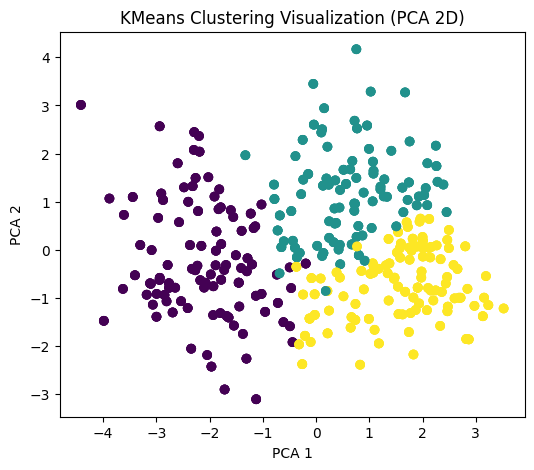

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Baca dataset
df = pd.read_csv('heart.csv')

# Normalisasi data numerik (WAJIB sebelum PCA)
num_df = df.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(num_df)

# PCA ke 2 dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisasi KMeans (pastikan labels_kmeans sudah dihasilkan sebelumnya)
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans, cmap='viridis')
plt.title("KMeans Clustering Visualization (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


## 6. ANN

In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from annoy import AnnoyIndex

# 1. Baca dataset
df = pd.read_csv('heart.csv')

# 2. Normalisasi fitur numerik
num_df = df.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(num_df)

# 3. Tentukan dimensi (jumlah fitur numerik hasil scaling)
dim = X_scaled.shape[1]

# 4. Buat index ANN (menggunakan metrik jarak Euclidean)
ann = AnnoyIndex(dim, 'euclidean')

# Tambahkan data ke index
for i in range(len(X_scaled)):
    ann.add_item(i, X_scaled[i])

# Bangun index (misal menggunakan 10 pohon)
ann.build(10)

# 5. Tentukan query point dan jumlah tetangga terdekat
query_idx = 42  # bisa ubah sesuai keinginan
n_neighbors = 5

# Cari N tetangga terdekat
neighbors, distances = ann.get_nns_by_item(query_idx, n_neighbors, include_distances=True)

# 6. Tampilkan hasil
print(f"Query Point Index: {query_idx}")
print("\nNearest Neighbors and Distances:")
for n, d in zip(neighbors, distances):
    print(f"Neighbor Index: {n} | Distance: {d:.4f}")


Query Point Index: 42

Nearest Neighbors and Distances:
Neighbor Index: 42 | Distance: 0.0000
Neighbor Index: 670 | Distance: 0.0000
Neighbor Index: 759 | Distance: 0.0000
Neighbor Index: 924 | Distance: 0.0000
Neighbor Index: 96 | Distance: 2.3698


## 7. Tulis kesimpulan singkat:

*   Perbedaan hasil KMeans dan DBSCAN, mana yang lebih baik diantara kedua model ini dan jelaskan jawaban anda ?
**JAWABAN : **
1.   KMeans lebih tepat untuk dataset ini berdasarkan Silhouette Score dan struktur cluster yang stabil.
2.   DBSCAN memiliki potensi (Davies-Bouldin bagus), tapi parameter default tidak cocok, sehingga menghasilkan banyak noise dan cluster yang tidak representatif.
3.  Dengan tuning parameter (misal eps & min_samples), DBSCAN mungkin bisa diperbaiki, tapi versi saat ini belum optimal.

*   Perbedaan hasil KMeans dan DBSCAN, mana yang lebih baik diantara kedua model ini dan jelaskan jawaban anda
**JAWABAN : **
1. Silhouette Score KMeans positif (+0.126), sedangkan DBSCAN negatif (–0.131) → menandakan KMeans membentuk cluster lebih jelas.
2. KMeans menghasilkan cluster yang terdistribusi dengan baik, sedangkan DBSCAN menganggap banyak data sebagai noise.
Kesimpulan: KMeans lebih optimal digunakan pada dataset heart.csv dibanding DBSCAN.

*   Hasil query Annoy: apakah tetangga yang ditemukan termasuk dalam cluster yang sama? Jelaskan jawaban anda.
**JAWABAN : ** tergantung hasil pengecekan label cluster dari indeks tetangga tersebut. Annoy mencari titik yang terdekat secara jarak, tapi kedekatan jarak tidak selalu berarti mereka berada dalam cluster yang sama (terutama pada model seperti DBSCAN yang mempertimbangkan density).






